# Problem Set 1 -- Dynamic Programming

### Name: Zunda Xu ( zunda@uchicago.edu )

### Problem 1:

#### (1) What are the state variables?

**Answer** : The state variables here are the stock of oil $B_{t}$ and the price of the oil $p_{t}$ at time $t$.

#### (2) What are the control variables?

** Answer **: The control variable is the amount of oil $s_{t}$ to sell at time $t$.

#### (3) What does the transition equation look like?

** Answer **: The transition equation is:

<t1><center>$B_{t+1} = B_{t} - s_{t}$ </center></t1>

#### (4) Write down the sequence problem of the owner. Write down the Bellman equation.

** Answer **: 

The sequence problem of the owner is:

<t1><center>$\max E_{t}\lbrace \sum^{\infty}_{i=1} p_{t+i} \cdot s_{t+i} \cdot (\frac{1}{1+r})^{i} \rbrace$, </center></t1>



<t1><center> Subject to: for $\forall i > 0$, $B_{t+i+1} = B_{t+i} - s_{t+i}$, $B_{t} = B$ and $B_{t+i} \geqslant 0$</center></t1>

The Bellman equation is:

<t1><center> $V(B) = \max_{s} \lbrace p \cdot s +\frac{1}{1+r}\cdot V(B-s) \rbrace$, </center></t1>

#### (5) What does the owner’s Euler equation like?

** Answer **:

The Euler equation of the owner is:

<t1><center> $p_{t+i} = p_{t+i+1} \cdot (\frac{1}{1+r})$, </center></t1>

#### (6) What would the solution of the problem look like if $p_{t+1} = p_{t}$ for all $t$? What would the solution look like if $p_{t+1} > (1 + r)p_{t}$ for all $t$? What is the condition on the path of prices necessary for an interior solution (where the owner will extract some, but not all, of the oil)?

** Answer **:

(i) If $p_{t+1} =p_{t}$ for all $t$, in my notation, which means $p_{t+i+1} =p_{t+i}$ for all $i$:

Then $s_{t} = B$, which means the owner should sell all the stock of oil today. The reason is that the owner will gain the same absolute payoff from selling a marginal unit in any period. However, since we discount the future, thus the solution for the owner is to sell everything today.

(ii) If $p_{t+1} > (1+r)p_{t}$ for all $t$, in my notation, which means $p_{t+i+1} > (1+r)p_{t+i}$:

Then for $\forall i, s_{t+i} = 0 $, which ia actually a violation of the transversality condition. Hence, the model is not stationary in this case

(iii) The condition on the path of prices necessary for an interior solution is: 

<t1><center> $p_{t+i} \cdot (1+r) = p_{t+i+1}$, </center></t1>

### Problem 2:

#### (1) What is (are) the state variable(s)?

** Answer**:

The state variables in this model are the capital $k_{t}$ and the shock $z_{t}$ at time $t$.

#### (2) What are the control variables?

** Answer **:

The control variable is the Consumption $c_{t}$ at time $t$.

#### (3) Write down the Bellman Equation that represents this sequence problem.

** Answer **:

The Bellman equation is:

<t1><center> $V(k_{t},z_{t}) = \max_{c^{\infty}_{t=0}} \lbrace u(c_{t}) + \beta E_{t} V(k_{t+1},z_{t+1})\rbrace$, </center></t1>

subject to the resource constraint:

<t1><center> $ k_{t+1} + c_{t} = z_{t}k^{\alpha}_{t} + (1-\delta)k_{t}$, </center></t1>

#### (4) Solve the growth model given the following parameterization.

** Answer **:

In [9]:
# Import the library and the package:
import numpy as np
import matplotlib.pyplot as plt
import ar1_approx as ar

%matplotlib inline

In [10]:
# Set the parameters 
# gamma: Coeﬃcient of Relative Risk Aversion
# beta: Discount factor
# sigma: Rate of physical depreciation
# alpha: Curvature of production function
# sigma_z: Standard deviation of productivity shocks

gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma_z = 0.2

In [11]:
'''
------------------------------------------------------------------------
Create Grid for State variable - Capital and Shock
------------------------------------------------------------------------
lb_k   : scalar, lower bound of capital grid
ub_k   : scalar, upper bound of capital grid
size_k : integer, number of grid points in capital state space
k_grid : vector, size_k x 1 vector of capital grid points 
size_z : integer, number of grid points in shocks state space
z_grid : vector, size_z x 1 vector of shock grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 60  # Number of grid points of k
size_z = 60 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

ln_z_grid, pi = ar.addacooper(size_z, 0, 0, sigma_z)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)

In [12]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
c   : matrix, current consumption c_t (c_t= z_t*(k_t)^alpha - (k_t+1) + (1-delta)*k_t)
u   : matrix, current period utility value for all possible choices of w and w' 
     (rows are w, columns w')
------------------------------------------------------------------------
'''

c = np.zeros((size_k, size_k, size_z))
for i in range(size_k): 
    for j in range(size_k): 
        for m in range(size_z): 
            c[i, j, m] = z_grid[m]* k_grid[i]**alpha - k_grid[j] + (1 - delta)*k_grid[i]

# replace 0 and negative consumption with a tiny value 
c[c<=0] = 1e-15
if gamma == 1:
    u = np.log(c)
else:
    u = (c ** (1 - gamma)) / (1 - gamma)
u[c<0] = -9999999

** Using VFI(value function iteration)**

In [15]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     : scalar, tolerance required for value function to converge
VFdist    : scalar, distance between last two value functions
VFmaxiter : integer, maximum number of iterations for value function
V         : vector, the value functions at each iteration
Vmat      : matrix, the value for each possible combination of w and w'
Vstore    : matrix, stores V at each iteration 
VFiter    : integer, current iteration number
TV        : vector, the value function after applying the Bellman operator
PF        : vector, indicies of choices of w' for all w 
VF        : vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
# initial guess at value function
V = np.zeros((size_k, size_z)) 
# initialize Vmat matrix
Vmat = np.zeros((size_k, size_k, size_z))
#initialize Vstore array
Vstore = np.zeros((size_k, size_z, VFmaxiter)) 
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print("The distance at {} iteration is {}".format(VFiter, VFdist))
    # loop over k_t
    for i in range(size_k): 
        # loop over k_t+1
        for j in range(size_k):
            #loop over z_t
            for m in range(size_z): 
                EV = 0
                for n in range(size_z):
                    EV += pi_z[m, n]*V[j, n]
                Vmat[i, j, m] = u[i, j, m] + beta * EV
    # store value function at each iteration for graphing later            
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) 
    TV = Vmat.max(1)
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()
    V = TV
    VFiter += 1
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge') 
    
# solution to the functional equation    
VF = V 

The distance at 1 iteration is 7.0
The distance at 2 iteration is 5.2679396139508
The distance at 3 iteration is 3.090559199888121
The distance at 4 iteration is 2.8002506796346065
The distance at 5 iteration is 2.616099018915172
The distance at 6 iteration is 2.4819149199332333
The distance at 7 iteration is 2.3694428068908024
The distance at 8 iteration is 2.2676731839886557
The distance at 9 iteration is 2.1728573957174575
The distance at 10 iteration is 2.0833540823576087
The distance at 11 iteration is 1.9983072808102307
The distance at 12 iteration is 1.9172031866428512
The distance at 13 iteration is 1.8396868204592671
The distance at 14 iteration is 1.7655013414361989
The distance at 15 iteration is 1.6944451582581088
The distance at 16 iteration is 1.6263428928414
The distance at 17 iteration is 1.5610464470134104
The distance at 18 iteration is 1.498419486504062
The distance at 19 iteration is 1.4383416836174803
The distance at 20 iteration is 1.38070064872759
The distance at

The distance at 159 iteration is 0.004738654292268052
The distance at 160 iteration is 0.004549108120599499
The distance at 161 iteration is 0.004367143795775519
The distance at 162 iteration is 0.004192458043945635
The distance at 163 iteration is 0.004024759722199178
The distance at 164 iteration is 0.003863769333293021
The distance at 165 iteration is 0.0037092185599760796
The distance at 166 iteration is 0.0035608498175747627
The distance at 167 iteration is 0.003418415824882004
The distance at 168 iteration is 0.0032816791918861554
The distance at 169 iteration is 0.003150412024211846
The distance at 170 iteration is 0.003024395543249625
The distance at 171 iteration is 0.00290341972151964
The distance at 172 iteration is 0.002787282932672497
The distance at 173 iteration is 0.0026757916153457018
The distance at 174 iteration is 0.00256875995074779
The distance at 175 iteration is 0.0024660095527480053
The distance at 176 iteration is 0.0023673691706278532
The distance at 177 iter

The distance at 308 iteration is 1.0816051627671186e-05
The distance at 309 iteration is 1.0383409573933022e-05
The distance at 310 iteration is 9.968073186428228e-06
The distance at 311 iteration is 9.56935026863448e-06
The distance at 312 iteration is 9.186576249931022e-06
The distance at 313 iteration is 8.819113219260544e-06
The distance at 314 iteration is 8.46634868878482e-06
The distance at 315 iteration is 8.127694741233427e-06
The distance at 316 iteration is 7.802586935667932e-06
The distance at 317 iteration is 7.490483483252319e-06
The distance at 318 iteration is 7.190864138806319e-06
The distance at 319 iteration is 6.903229575527803e-06
The distance at 320 iteration is 6.627100390232954e-06
The distance at 321 iteration is 6.36201639281353e-06
The distance at 322 iteration is 6.107535739374725e-06
The distance at 323 iteration is 5.863234306957565e-06
The distance at 324 iteration is 5.628704940363605e-06
The distance at 325 iteration is 5.403556741612192e-06
The distanc

<Figure size 432x288 with 0 Axes>

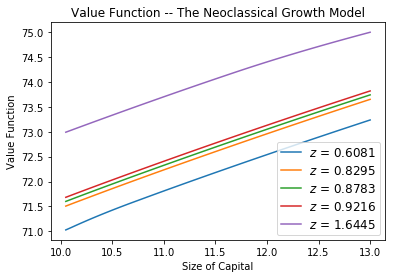

In [18]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(round(z_grid[0],4)))
ax.plot(k_grid[1:], VF[1:, 10], label='$z$ = ' + str(round(z_grid[10],4)))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(round(z_grid[15],4)))
ax.plot(k_grid[1:], VF[1:, 20], label='$z$ = ' + str(round(z_grid[20],4)))
ax.plot(k_grid[1:], VF[1:, (size_z-1)], label='$z$ = ' + str(round(z_grid[(size_z-1)],4)))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function -- The Neoclassical Growth Model')
plt.show()

<Figure size 432x288 with 0 Axes>

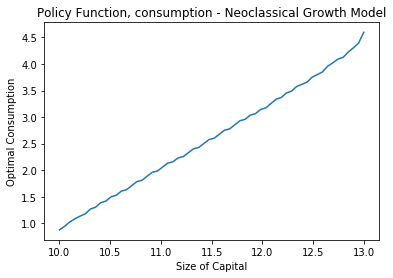

In [19]:
#Plot optimal consumption rule as a function of capital
opt_k = k_grid[PF]
opt_c = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - opt_k
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], opt_c[:][18], label='Consumption')

for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5) 
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - Neoclassical Growth Model')
plt.show()

<Figure size 432x288 with 0 Axes>

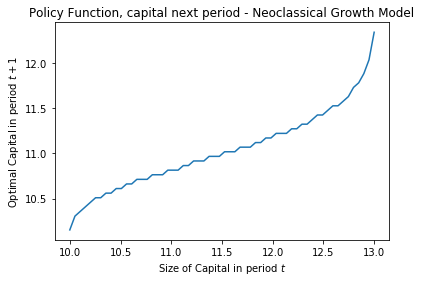

In [20]:
#Plot optimal capital in next period rule as a function of capital size
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], opt_k[:][18], label='Capital in period $t+1$')

for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)
plt.xlabel('Size of Capital in period $t$')
plt.ylabel('Optimal Capital in period $t+1$')
plt.title('Policy Function, capital next period - Neoclassical Growth Model')
plt.show()

### Problem 3:

#### (1) Write down the Bellman Equation that represents the planner’s problem in this case.

** Answer **:

The Bellman Equation is:

<t1><center> $V(k_{t},z_{t}) = \max_{c^{\infty}_{t=0}} \lbrace u(c_{t}) + \beta E_{z_{t+1}|z_{t}} V(k_{t+1},z_{t+1})\rbrace$, </center></t1>

subject to the resource constraint:

<t1><center> $ k_{t+1} + c_{t} = z_{t}k^{\alpha}_{t} + (1-\delta)k_{t}$, </center></t1>

#### (2) Approximate the AR(1) process with a Markov chain and solve the model:

In [31]:
# Set the parameters 
# gamma: Coeﬃcient of Relative Risk Aversion
# beta: Discount factor
# sigma: Rate of physical depreciation
# alpha: Curvature of production function
# sigma_z: Standard deviation of productivity shocks
# mu: Centre of log normal distribution
# rho: Persistence parameter

gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma_v = 0.1
mu = 0
rho = 0.8

In [32]:
'''
------------------------------------------------------------------------
Create Grid for State variable - Capital and Shock
------------------------------------------------------------------------
lb_k   : scalar, lower bound of capital grid
ub_k   : scalar, upper bound of capital grid
size_k : integer, number of grid points in capital state space
k_grid : vector, size_k x 1 vector of capital grid points 
size_z : integer, number of grid points in shocks state space
z_grid : vector, size_z x 1 vector of shock grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 30  # Number of grid points of k
size_z = 30 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

ln_z_grid, pi = ar.addacooper(size_z, mu, rho, sigma_v)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)

In [33]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
c   : matrix, current consumption c_t (c_t= z_t*(k_t)^alpha - (k_t+1) + (1-delta)*k_t)
u   : matrix, current period utility value for all possible choices of w and w' 
     (rows are w, columns w')
------------------------------------------------------------------------
'''

c = np.zeros((size_k, size_k, size_z))
for i in range(size_k): 
    for j in range(size_k): 
        for m in range(size_z): 
            c[i, j, m] = z_grid[m]* k_grid[i]**alpha - k_grid[j] + (1 - delta)*k_grid[i]

# replace 0 and negative consumption with a tiny value 
c[c<=0] = 1e-15
if gamma == 1:
    u = np.log(c)
else:
    u = (c ** (1 - gamma)) / (1 - gamma)
u[c<0] = -9999999

In [34]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol_2     : scalar, tolerance required for value function to converge
VFdist_2    : scalar, distance between last two value functions
VFmaxiter_2 : integer, maximum number of iterations for value function
V_2         : vector, the value functions at each iteration
Vmat_2      : matrix, the value for each possible combination of w and w'
Vstore_2    : matrix, stores V at each iteration 
VFiter_2    : integer, current iteration number
TV_2        : vector, the value function after applying the Bellman operator
PF_2        : vector, indicies of choices of w' for all w 
VF_2        : vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol_2 = 1e-6 
VFdist_2 = 7.0 
VFmaxiter_2 = 500 
# initial guess at value function
V_2 = np.zeros((size_k, size_z)) 
# initialize Vmat matrix
Vmat_2 = np.zeros((size_k, size_k, size_z))
#initialize Vstore array
Vstore_2 = np.zeros((size_k, size_z, VFmaxiter_2)) 
VFiter_2 = 1 
while VFdist_2 > VFtol_2 and VFiter_2 < VFmaxiter_2:
    print("The distance at {} iteration is {}".format(VFiter_2, VFdist_2))
    # loop over k_t
    for i in range(size_k): 
        # loop over k_t+1
        for j in range(size_k):
            #loop over z_t
            for m in range(size_z): 
                EV = 0
                for n in range(size_z):
                    EV += pi_z[m, n]*V_2[j, n]
                Vmat_2[i, j, m] = u[i, j, m] + beta * EV
    # store value function at each iteration for graphing later            
    Vstore_2[:,:, VFiter_2] = V_2.reshape(size_k, size_z,) 
    TV_2 = Vmat_2.max(1)
    PF_2 = np.argmax(Vmat_2, axis=1)
    VFdist_2 = (np.absolute(V_2 - TV_2)).max()
    V_2 = TV_2
    VFiter_2 += 1
    
if VFiter_2 < VFmaxiter_2:
    print('Value function converged after this many iterations:', VFiter_2)
else:
    print('Value function did not converge') 
    
# solution to the functional equation    
VF_2 = V_2 

The distance at 1 iteration is 7.0
The distance at 2 iteration is 5.057120757426964
The distance at 3 iteration is 3.4330013950434344
The distance at 4 iteration is 3.1229691910173845
The distance at 5 iteration is 2.899127801173252
The distance at 6 iteration is 2.713649201705291
The distance at 7 iteration is 2.551092898737817
The distance at 8 iteration is 2.4081503578423877
The distance at 9 iteration is 2.280575314366004
The distance at 10 iteration is 2.1653659554346874
The distance at 11 iteration is 2.0603056054400497
The distance at 12 iteration is 1.963693090947661
The distance at 13 iteration is 1.8742015930709748
The distance at 14 iteration is 1.7907913130546333
The distance at 15 iteration is 1.7126404255388366
The distance at 16 iteration is 1.6390948514655364
The distance at 17 iteration is 1.5696308133380654
The distance at 18 iteration is 1.503824401505419
The distance at 19 iteration is 1.4413279753269634
The distance at 20 iteration is 1.3818544620585769
The distanc

The distance at 159 iteration is 0.0047170765028567985
The distance at 160 iteration is 0.004528393442782885
The distance at 161 iteration is 0.00434725770503519
The distance at 162 iteration is 0.004173367396845151
The distance at 163 iteration is 0.0040064327009901035
The distance at 164 iteration is 0.003846175392936857
The distance at 165 iteration is 0.0036923283772267723
The distance at 166 iteration is 0.003544635242150207
The distance at 167 iteration is 0.003402849832468746
The distance at 168 iteration is 0.0032667358391620382
The distance at 169 iteration is 0.003136066405588167
The distance at 170 iteration is 0.0030106237493896515
The distance at 171 iteration is 0.0028901987994061074
The distance at 172 iteration is 0.0027745908474514636
The distance at 173 iteration is 0.002663607213520436
The distance at 174 iteration is 0.002557062925021114
The distance at 175 iteration is 0.002454780408015722
The distance at 176 iteration is 0.0023565891916774717
The distance at 177 i

The distance at 308 iteration is 1.0766799988459752e-05
The distance at 309 iteration is 1.0336128013932466e-05
The distance at 310 iteration is 9.922682906449154e-06
The distance at 311 iteration is 9.525775553242966e-06
The distance at 312 iteration is 9.144744538502891e-06
The distance at 313 iteration is 8.778954779131709e-06
The distance at 314 iteration is 8.427796601040427e-06
The distance at 315 iteration is 8.0906847301776e-06
The distance at 316 iteration is 7.767057326191207e-06
The distance at 317 iteration is 7.456375044512242e-06
The distance at 318 iteration is 7.158120041594884e-06
The distance at 319 iteration is 6.871795250162904e-06
The distance at 320 iteration is 6.596923455504111e-06
The distance at 321 iteration is 6.333046513873342e-06
The distance at 322 iteration is 6.079724641949724e-06
The distance at 323 iteration is 5.836535677872234e-06
The distance at 324 iteration is 5.603074242799266e-06
The distance at 325 iteration is 5.378951271950427e-06
The distan

<Figure size 432x288 with 0 Axes>

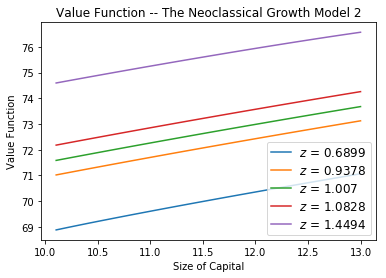

In [35]:
# Plot value function
plt.figure()
fig2, ax2 = plt.subplots()
ax2.plot(k_grid[1:], VF_2[1:, 0], label='$z$ = ' + str(round(z_grid[0],4)))
ax2.plot(k_grid[1:], VF_2[1:, 10], label='$z$ = ' + str(round(z_grid[10],4)))
ax2.plot(k_grid[1:], VF_2[1:, 15], label='$z$ = ' + str(round(z_grid[15],4)))
ax2.plot(k_grid[1:], VF_2[1:, 20], label='$z$ = ' + str(round(z_grid[20],4)))
ax2.plot(k_grid[1:], VF_2[1:, (size_z-1)], label='$z$ = ' + str(round(z_grid[(size_z-1)],4)))
# Now add the legend with some customizations.
legend = ax2.legend(loc='lower right', shadow=False)

for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function -- The Neoclassical Growth Model 2')
plt.show()

<Figure size 432x288 with 0 Axes>

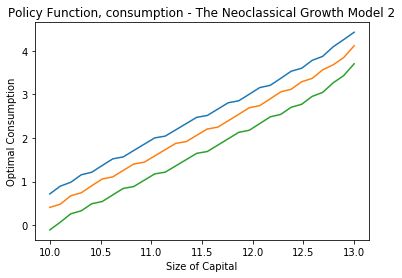

In [36]:
#Plot optimal consumption rule as a function of capital
opt_k = k_grid[PF_2]
opt_c = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - opt_k
plt.figure()
fig, ax3 = plt.subplots()
ax3.plot(k_grid[:], opt_c[:][10], label='Consumption')
ax3.plot(k_grid[:], opt_c[:][14], label='Consumption')
ax3.plot(k_grid[:], opt_c[:][19], label='Consumption')

for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - The Neoclassical Growth Model 2')
plt.show()

<Figure size 432x288 with 0 Axes>

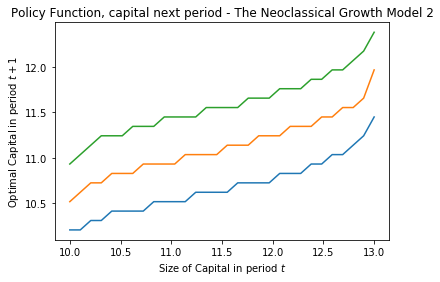

In [37]:
#Plot optimal capital in period t + 1 rule as a function of capital size
plt.figure()
fig, ax4 = plt.subplots()
ax4.plot(k_grid[:], opt_k[:][5], label='Capital in period $t+1$')
ax4.plot(k_grid[:], opt_k[:][10], label='Capital in period $t+1$')
ax4.plot(k_grid[:], opt_k[:][15], label='Capital in period $t+1$')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period $t$')
plt.ylabel('Optimal Capital in period $t+1$')
plt.title('Policy Function, capital next period - The Neoclassical Growth Model 2')
plt.show()

### Problem 4:

#### (1) Write down the Bellman equation representing this optimal stopping problem.

** Answer **:

The Bellman equation is:

<t1><center> $V(w) = \max \lbrace V^{U}(w), V^{E}(w)\rbrace$, </center></t1>

Where:

<t1><center> $V^{U}(w) = b + \beta EV(w) $, </center></t1>

<t1><center> $V^{E}(w) = E_{0}\sum^{\infty}_{t=0} \beta^{t}w = \frac{w}{1-\beta}$. </center></t1>

#### (2) Solve this model, using the following parameterization:

** Answer **:

In [87]:
# Set parameters
# beta: Rate of time preference
# b : Unemployment beneﬁts
# mu: Mean of log wages
# sigma: Standard deviation of wage draws

beta = 0.96
b = 0.05
mu = 0
sigma = 0.15
size_w = 100
rho = 0

In [80]:
'''
------------------------------------------------------------------------
Create Grid for State Space
------------------------------------------------------------------------
ub_w      : scalar, upper bound of wage grid
size_w    : integer, number of grid points in wage state space
w_grid    : vector, size_w x 1 vector of grid points
------------------------------------------------------------------------
'''
ln_w_grid, pi_t = ar.addacooper(size_w, mu, rho, sigma)
w_grid = np.exp(ln_w_grid)
pi = np.transpose(pi_t)

In [81]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
U  : matrix, current period utility value for all possible
     choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''
u = np.zeros(size_w) 
for i in range(size_w): 
        u[i] = (w_grid[i])/(1-beta)

In [82]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       : scalar, tolerance required for value function to converge
VFdist      : scalar, distance between last two value functions
VFmaxiter   : integer, maximum number of iterations for value function
V           : matrix, the value functions at each iteration
TV          : matrix, the value function after applying the Bellman operator
PF_discrete : matrix, matrix of policy function: eat=1, not eat=0 
Vstore      : array, stores V at each iteration 
VFiter      : integer, current iteration number
EV          : scalar, expected value function for a given state
U_eat       : matrix, utility from eating cake now
Vwait       : matrix, value of waiting to eat the cake
VF          : vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol_3 = 1e-8 
VFdist_3 = 7.0 
VFmaxiter_3 = 500 
# initial guess at value function
V_3 = np.zeros(size_w) 
TV_3 = np.zeros(size_w)
PF_discrete = np.zeros(size_w)
# initialize Vmat matrix
Vstore_3 = np.zeros((size_w, VFmaxiter_3)) 
VFiter_3 = 1 
while VFdist_3 > VFtol_3 and VFiter_3 < VFmaxiter_3:
    print("The distance at {} iteration is {}".format(VFiter_3, VFdist_3))
    for i in range(size_w):
        EV = 0
        for j in range(size_w): 
            EV += pi[i, j] * V_3[j]   
        u_emp = u[i]
        V_unemp = b + beta * EV 
        TV_3[i] = max(u_emp, V_unemp)
        PF_discrete[i] = u_emp >= V_unemp  # = 1 if take job
        
    # store value function at each iteration for graphing later 
    Vstore_3[:, VFiter_3] = TV_3 
    VFdist_3 = (np.absolute(V_3 - TV_3)).max()  # check distance
    V_3 = TV_3
    VFiter_3 += 1 
    
if VFiter_3 < VFmaxiter_3:
    print('Value function converged after this many iterations:', VFiter_3)
else:
    print('Value function did not converge') 
    
VF_3 = V_3

The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3


In [83]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_w = w_grid[np.argmax(PF_discrete)]
print(threshold_w)

1.03472481446


<Figure size 432x288 with 0 Axes>

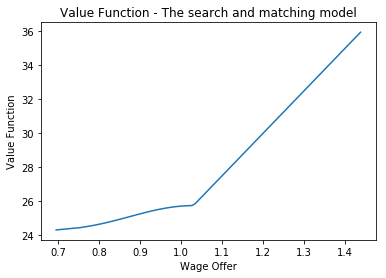

In [84]:
# Plot value function 
plt.figure()
fig, ax5 = plt.subplots()
ax5.plot(w_grid[:], VF_3[:])
 
plt.xlabel('Wage Offer')
plt.ylabel('Value Function')
plt.title('Value Function - The search and matching model')
plt.show()

In [85]:
#Set grid of b
grid_b = np.linspace(0.05, 1, 20)
threshold_vec = np.zeros(20)

#Begin for loop
for m in range(20):
    VFtol_4 = 1e-8 
    VFdist_4 = 7.0 
    VFmaxiter_4 = 500 
    V_4 = np.zeros(size_w) # initial guess at value function
    TV_4 = np.zeros(size_w)
    PF_discrete_2 = np.zeros(size_w)
    Vstore_4 = np.zeros((size_w, VFmaxiter_4)) #initialize Vstore array
    VFiter_4 = 1 
    while VFdist_4 > VFtol_4 and VFiter_4 < VFmaxiter_4:
        print("The distance at {} iteration is {}".format(VFiter_4, VFdist_4))
        for i in range(size_w): # loop over w
            EV = 0
            for j in range(size_w):  # loop over w
                EV += pi[i, j] * V_4[j]    
            u_emp = u[i]
            V_unemp = grid_b[m] + beta * EV 
            TV_4[i] = max(u_emp, V_unemp)
            PF_discrete_2[i] = u_emp >= V_unemp
            
        Vstore_4[:, VFiter_4] = TV_4 # store value function at each iteration for graphing later 
        VFdist_4 = (np.absolute(V_4 - TV_4)).max()  # check distance
        V_4 = TV_4
        VFiter_4 += 1  
        
    if VFiter_4 < VFmaxiter_4:
        print('Value function converged after this many iterations:', VFiter_4)
    else:
        print('Value function did not converge')
        
    VF_4 = V_4 # solution to the functional equation
    threshold_vec[m]= w_grid[np.argmax(PF_discrete_2)]

The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration is 7.0
The distance at 2 iteration is 35.94578546211266
Value function converged after this many iterations: 3
The distance at 1 iteration

In [86]:
print(threshold_vec)

[ 1.03472481  1.03472481  1.04279291  1.04279291  1.05104386  1.05104386
  1.05950847  1.05950847  1.05950847  1.06822176  1.06822176  1.07722417
  1.07722417  1.08656302  1.08656302  1.08656302  1.09629462  1.09629462
  1.10648704  1.10648704]


<Figure size 432x288 with 0 Axes>

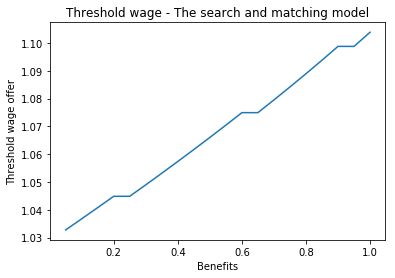

In [70]:
# Plot resevation wage as function of benefits 
plt.figure()
fig, ax6 = plt.subplots()
ax6.plot(grid_b[:], threshold_vec[:])

plt.xlabel('Benefits')
plt.ylabel('Threshold wage offer')
plt.title('Threshold wage - The search and matching model')
plt.show()
